# Resumo Series temporais - Formação Cientista de dados

### Será usado o dataset airpassengers do R

### Tendência e Sazonalidade

In [ ]:
AirPassengers

In [ ]:
start(AirPassengers) #inicio do dataset

In [ ]:
end(AirPassengers) #fim do dataset

In [ ]:
plot(AirPassengers)

Conclusão do plot :
O transporte teve evolução ao longo do tempo

In [ ]:
plot(aggregate(AirPassengers))

Nota-se a suavização através do valor total do ano.

In [ ]:
monthplot(AirPassengers) #valor agregado por mês

Nota-se o pico próximo ao período de férias 

In [ ]:
subst = window (AirPassengers, start = c(1960,1), end=c(1960,12)) #extração de uma janela da série temporal
plot(subst)

Nota-se a série com mais detalhamento.

Conclusão: Embora haja efeitos sazonais há uma tendência de crescimento ao longo das datas.

### Decomposição

In [ ]:
dec = decompose(AirPassengers) # decomposição das séries temporais
dec

In [ ]:
dec$seasonal #sazonalidade

In [ ]:
dec$trend #tendencia

In [ ]:
dec$random # aleatoridade

In [ ]:
plot(dec$seasonal) # Nota-se o efeito da sazonalidade estável

In [ ]:
plot(dec$trend) # nota-se o efeito de crescimento

In [ ]:
plot(dec$random) #Nota se o efeito da aleatoridade do modelo

In [ ]:
plot(dec)

Todos os dados plotados juntos

### Previsão
Há várias maneiras de realizar a previsão do modelo, será demonstrado algumas abaixo:

In [ ]:
mean(AirPassengers) # Pela média pode-se ter uma noção sobre a previsão mas possui muitos erros.

In [ ]:
#pelo ultimo ano, pode-se atenuar o erro.
mean(window(AirPassengers, start=c(1960, 1), end= c(1960,12)))

In [ ]:
# Mesmo assim a série é temporal e possui sazonalidade e tendencia....

In [1]:
#Pela média móvel, o valor da média se ajusta com o passar do tempo
#Para isso é necessário instalar o pacote forecast
install.packages("forecast")

Installing package into 'C:/Users/dmiyake/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dmiyake\AppData\Local\Temp\RtmpyG5MCy\downloaded_packages


In [2]:
library(forecast)

In [4]:
mediamovel = ma(AirPassengers, order=12)
mediamovel

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1949       NA       NA       NA       NA       NA       NA 126.7917 127.2500
1950 131.2500 133.0833 134.9167 136.4167 137.4167 138.7500 140.9167 143.1667
1951 157.1250 159.5417 161.8333 164.1250 166.6667 169.0833 171.2500 173.5833
1952 183.1250 186.2083 189.0417 191.2917 193.5833 195.8333 198.0417 199.7500
1953 215.8333 218.5000 220.9167 222.9167 224.0833 224.7083 225.3333 225.3333
1954 228.0000 230.4583 232.2500 233.9167 235.6250 237.7500 240.5000 243.9583
1955 261.8333 266.6667 271.1250 275.2083 278.5000 281.9583 285.7500 289.3333
1956 309.9583 314.4167 318.6250 321.7500 324.5000 327.0833 329.5417 331.8333
1957 348.2500 353.0000 357.6250 361.3750 364.5000 367.1667 369.4583 371.2083
1958 375.2500 377.9167 379.5000 380.0000 380.7083 380.9583 381.8333 383.6667
1959 402.5417 407.1667 411.8750 416.3333 420.5000 425.5000 430.7083 435.1250
1960 456.3333 461.3750 465.2083 469.3333 472.7500 475.0417       NA       NA

In [5]:
mediamovel = ma(AirPassengers, order=2) #calcula a order em 2
mediamovel

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1949     NA 120.00 127.75 127.75 126.50 134.75 144.75 145.00 134.75 119.50
1950 118.50 127.00 135.75 134.00 133.50 148.25 164.75 167.00 154.75 134.50
1951 145.00 155.75 167.25 169.00 171.25 181.75 193.75 195.25 182.25 163.50
1952 172.00 181.00 186.75 184.50 191.25 212.25 230.00 230.75 212.75 190.75
1953 195.50 206.00 225.75 233.75 234.00 244.75 260.75 261.25 239.25 209.75
1954 199.25 203.75 221.25 230.75 239.75 266.00 290.25 286.75 260.00 230.00
1955 236.50 243.75 259.00 268.75 281.00 316.00 347.50 342.50 311.25 274.25
1956 280.75 288.75 306.00 315.25 330.75 369.75 401.25 394.50 355.25 309.50
1957 309.25 318.25 340.25 351.75 370.00 416.00 454.75 450.75 405.50 350.75
1958 333.50 334.50 347.50 355.25 377.25 431.00 480.50 476.25 418.00 358.00
1959 349.75 362.50 387.50 404.50 427.00 478.00 531.75 532.25 473.00 409.75
1960 407.50 404.50 422.50 453.25 485.00 541.00 596.25 585.50 520.75 455.00
        Nov    Dec
1949 1

In [6]:
mediamovel = ma(AirPassengers, order=12)
previsao = forecast(mediamovel, h=12)

Warning message in ets(object, lambda = lambda, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"

In [7]:
previsao

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jul 1960       477.3339 475.9379 478.7299 475.1989 479.4689
Aug 1960       479.6260 476.5022 482.7498 474.8485 484.4035
Sep 1960       481.9181 476.6856 487.1507 473.9156 489.9206
Oct 1960       484.2102 476.5421 491.8784 472.4828 495.9377
Nov 1960       486.5023 476.1077 496.8970 470.6051 502.3996
Dec 1960       488.7944 475.4083 502.1806 468.3220 509.2668
Jan 1961       491.0866 474.4634 507.7097 465.6637 516.5094
Feb 1961       493.3787 473.2887 513.4687 462.6537 524.1037
Mar 1961       495.6708 471.8965 519.4450 459.3112 532.0303
Apr 1961       497.9629 470.2975 525.6282 455.6524 540.2734
May 1961       500.2550 468.5005 532.0095 451.6907 548.8193
Jun 1961       502.5471 466.5131 538.5811 447.4378 557.6564

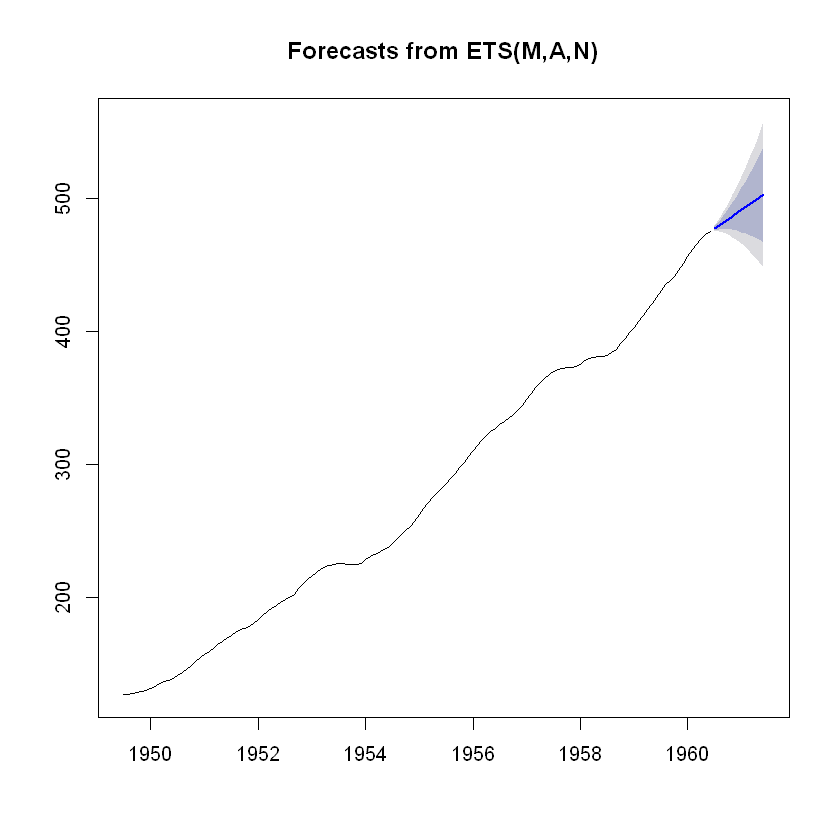

In [8]:
plot(previsao)

Nota-se o efeito da média movel de acordo com a previsão do modelo

In [10]:
arima = auto.arima(AirPassengers)
arima

Series: AirPassengers 
ARIMA(2,1,1)(0,1,0)[12]                    

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 estimated as 132.3:  log likelihood=-504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

In [11]:
previsao = forecast(arima, h=12)
previsao

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       445.6349 430.8903 460.3795 423.0851 468.1847
Feb 1961       420.3950 403.0907 437.6993 393.9304 446.8596
Mar 1961       449.1983 429.7726 468.6240 419.4892 478.9074
Apr 1961       491.8399 471.0270 512.6529 460.0092 523.6707
May 1961       503.3945 481.5559 525.2330 469.9953 536.7937
Jun 1961       566.8624 544.2637 589.4612 532.3007 601.4242
Jul 1961       654.2602 631.0820 677.4383 618.8122 689.7081
Aug 1961       638.5975 614.9704 662.2246 602.4630 674.7320
Sep 1961       540.8837 516.9028 564.8647 504.2081 577.5594
Oct 1961       494.1266 469.8624 518.3909 457.0177 531.2356
Nov 1961       423.3327 398.8381 447.8273 385.8715 460.7939
Dec 1961       465.5076 440.8229 490.1923 427.7556 503.2596

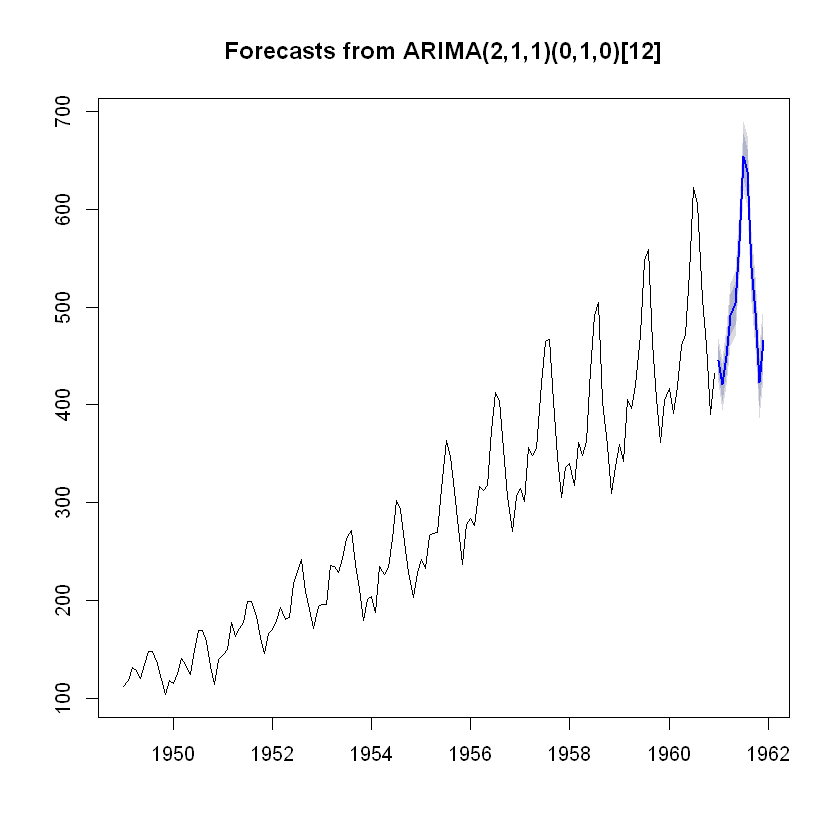

In [12]:
plot(previsao)

A previsão seguiu a estrutura do efeito sazonal, tendo assim uma previsão mais segura.